In [1]:
# https://guoguibing.github.io/librec/datasets.html

!pip install scikit-surprise

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.4/154.4 kB 2.3 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.4-cp310-cp310-linux_x86_64.whl size=2357246 sha256=1ba840f31ecebbbd33ed1503c9d2180ad0b96b5228d1580971e270c0a3058061
  Stored in directory: /root/.cache/pip/wheels/4b/3f/df/6acbf0a40397d9bf3ff97f582cc22fb9ce66adde75bc71fd54
Successfully built scikit-surprise


In [27]:
import surprise
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
dataset = pd.read_csv('ratings.txt', sep=' ', names=['user_id', 'movie_id',
                                                     'rating'])
dataset.head()

,user_id,movie_id,rating
0,1,1,2.0
1,1,2,4.0
2,1,3,3.5
3,1,4,3.0
4,1,5,4.0


In [24]:
qtd_filmes = dataset['movie_id'].nunique()
qtd_usuarios = dataset['user_id'].nunique()
len_dataset = dataset.shape[0] # len(dataset)

print("Total de filmes: ", qtd_filmes)
print("Total de usuários: ", qtd_usuarios)
print("Total de amostras do dataset: ", len_dataset)

Total de filmes:  2071
Total de usuários:  1508
Total de amostras do dataset:  35497


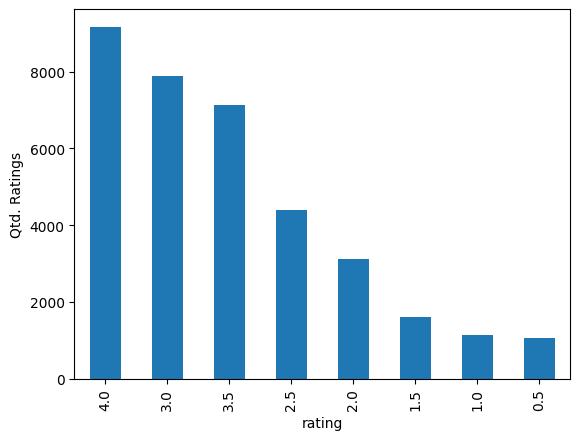

In [29]:
dataset['rating'].value_counts().plot(kind='bar')
plt.ylabel('Qtd. Ratings')
plt.show()

In [32]:
menor_rating = dataset['rating'].min()
maior_rating = dataset['rating'].max()

print(f"O menor rating é {menor_rating} e o maior é {maior_rating}")

O menor rating é 0.5 e o maior é 4.0


In [34]:
from surprise import Reader, Dataset, SVDpp

reader = Reader(rating_scale=(menor_rating, maior_rating))
dataset_surprise = Dataset.load_from_df(dataset, reader)
dataset_full = dataset_surprise.build_full_trainset()

svdpp = SVDpp(n_factors=30)
svdpp.fit(dataset_full)

In [35]:
test_set = dataset_full.build_anti_testset()
preds = svdpp.test(test_set)

In [36]:
preds[:5]

[Prediction(uid=1, iid=13, r_ui=3.0028030537791928, est=3.585625863946147, details={'was_impossible': False}),
 Prediction(uid=1, iid=14, r_ui=3.0028030537791928, est=2.9476637084718433, details={'was_impossible': False}),
 Prediction(uid=1, iid=15, r_ui=3.0028030537791928, est=3.0923547660562303, details={'was_impossible': False}),
 Prediction(uid=1, iid=16, r_ui=3.0028030537791928, est=3.525890223068137, details={'was_impossible': False}),
 Prediction(uid=1, iid=17, r_ui=3.0028030537791928, est=3.0221800975260114, details={'was_impossible': False})]

In [44]:
from collections import defaultdict

def get_top_k(preds, k):
  topk = defaultdict(list)
  for user, movie, _, pred, _ in preds:
    topk[user].append((movie, pred))
  for user, pred_user in topk.items():
    pred_user.sort(key=lambda x: x[1], reverse=True)
    topk[user] = pred_user[:k]
  return topk

In [45]:
top_10 = get_top_k(preds, 10)

In [46]:
for user, pred_user in top_10.items():
  print(user, [movie for (movie, _) in pred_user])

1 [286, 335, 805, 299, 658, 363, 689, 446, 400, 398]
2 [286, 805, 728, 675, 414, 278, 335, 365, 689, 307]
3 [508, 514, 704, 464, 384, 257, 446, 638, 1890, 241]
4 [286, 805, 335, 675, 299, 728, 363, 218, 563, 400]
5 [286, 805, 675, 728, 11, 299, 318, 335, 689, 658]
6 [286, 335, 675, 658, 363, 805, 307, 689, 299, 68]
7 [286, 805, 675, 307, 728, 689, 705, 658, 1091, 335]
8 [286, 476, 689, 335, 805, 299, 675, 307, 658, 318]
9 [335, 286, 805, 728, 278, 1091, 299, 689, 675, 68]
10 [286, 805, 675, 335, 363, 728, 1173, 96, 689, 398]
11 [286, 335, 805, 675, 705, 658, 525, 318, 307, 728]
12 [286, 805, 363, 563, 335, 689, 400, 521, 414, 96]
13 [286, 318, 728, 365, 689, 563, 1173, 534, 5, 304]
14 [335, 658, 286, 318, 11, 675, 805, 307, 242, 689]
15 [286, 705, 805, 363, 675, 689, 335, 250, 318, 242]
16 [286, 805, 675, 696, 363, 689, 297, 299, 770, 728]
17 [286, 335, 689, 638, 702, 675, 805, 728, 307, 446]
18 [286, 363, 335, 805, 728, 432, 425, 299, 675, 309]
19 [286, 658, 307, 335, 68, 675, 728, 18

In [49]:
print(f"Os 10 mais filmes do usuário 10 são: \n{[movie for (movie, _) in top_10[10]]}")

Os 10 mais filmes do usuário 10 são: 
[286, 805, 675, 335, 363, 728, 1173, 96, 689, 398]


In [55]:
top_10[10]

[(286, 3.8559541508791706),
 (805, 3.7770244068775063),
 (675, 3.674822629264635),
 (335, 3.653494775549668),
 (363, 3.636668539028602),
 (728, 3.6351972675368005),
 (1173, 3.6148334396987902),
 (96, 3.611754612373148),
 (689, 3.6076459232666203),
 (398, 3.602976308369396)]